## 1.重制项目的原因

**1.1原因**

PaddleDetection一开始更新旋转框目标检测模型**s2anet**，我就尝试了这个模型，并编写了一个项目，从标注数据到跑通旋转框目标检测模型。但是使用过程中，无论数据标注，到模型的跑通，都出了不少问题。

后来PaddleDetection2.6版本新出自有研发的模型**PP-YOYOE-R**。自己本地电脑尝试过后，发现之前模型训练和验证期间不再出问题。我就想重做之前的项目，让别人也尝试一下好用**PP-YOLOE-R**模型。

还用PaddleDetection官方文档对于如何标注旋转框数据和转换数据方面的资料比较少。之前的项目我也做了一个脚本方便用户标注完进行转换。后来，我还是觉得麻烦，毕竟PaddleDetection提供了这么方便的训练模式。只要用户解决了数据标注问题。那跑起项目，其实就很很很简单的事。因此我就对别人大神制作的**RoLabelImg**旋转框标注工具进行二次修改。根据PaddleDetection对旋转框数据的格式要求，在**RoLabelImg**工具上增加了一键转换格式的功能。让用户标注完数据后，点点鼠标就转换好数据，可以直接让PaddleDetection的**PP-YOLOE-R**读取，项目就可以开跑了。

**1.2旧项目地址：**
【手把手教程】标注数据到使用PaddleDetection旋转框训练数据：https://aistudio.baidu.com/aistudio/projectdetail/1890589）


**1.3现在基于之前的有关旋转框检测的旧项目进行修改。如下：**
1. 原来的数据格式，PP-YOLOE-R不再适用。
2. 修改了标注工具，标注到格式一键转换。
3. PP-YOLOE-R训练和验证过程不再出现旧项目的错误。
4. 增加视频版，为了让用户有手就可以跑通项目。


## 2.背景
【1】最近[PaddleDetection 正式发布v2.6](https://github.com/PaddlePaddle/PaddleDetection)，PP-YOLOE家族增加了不少新成员，用来解决不同场景问题。
特别看到新出来旋转框检测模型**PP-YOLOE-R**。马上就来兴趣了。而且**PP-YOLOE-R** 是一个基于PP-YOLOE模型进行开发的高效且单阶段的旋转框检测模型，无论是精度和速度上都比主流的选择框检测模型都要高。而且避免了使用特殊的算子，利于在不同硬件上进行部署。尝试使用过程中，感受就是一个字“爽”。

【2】而且觉得旋转框目标检测很“神奇”，比起平行框目标检测。旋转框更“贴近”目标，减少背景。例如我的项目经常使用语义分割，分割目标然后再通过对掩膜进行后处理，然后得到最大外界矩形。从而知道这个目标的一些形状参数，例如直径、方向、旋转角度等参数。如果使用旋转框目标检测，那问题就变得简单。起码目标检测标注数据比语义分割省不少时间，而且目标检测的精度不低，速度也很快。


## 3. 解决数据标注转换问题---RoLabelImgV2
1. [roLabelImgV2的github地址](https://github.com/richarddddd198/roLabelImgV2)
2. 之前的项目介绍了用**roLabelImg**来标注数据，标注文件是XML格式，然后用代码来转换成COCO格式(旧格式不再适用2.6版本的PaddleDetection)。个人认为还是很麻烦，然后就在**roLabelImg**的基础上增加了一键转换成COCO格式的按钮。还提供训练集和验证集的比例划分功能。最终修改成**roLabelImgV2**版本，也提供了[**打包版**](https://github.com/richarddddd198/roLabelImgV2/blob/main/roLabelImgV2.zip)，window用户解压即可用。现在用户标注完数据后一键转换数据，可以直接让PaddleDetection2.6版本读取。

![](https://ai-studio-static-online.cdn.bcebos.com/46b0ddca174143cf9c039e05b5b9a8da9a1013ff13b046219d99ba84f492a496)

## 4.从标注数据到跑通PP-YOYOE-R(视频版)
录制了从标注数据，到如果上传数据到Aistudio和新建项目跑通旋转框目标检测的整个流程。就是一定让用户跑通项目。 


## 5.安装paddleDetection和解压数据
1. 从github或者gitee把PaddleDetection克隆下来，并安装对应的依赖和特定算子。
2. 解压自己用**RoLabelImgV2**标注且转换好的数据。解压路径为PaddleDetection/dataset

In [1]:
#克隆paddleDetection并安装
%cd /home/aistudio
#!git clone https://gitee.com/PaddlePaddle/PaddleDetection.git
%cd PaddleDetection 
!pip install -r requirements.txt -i https://mirror.baidu.com/pypi/simple #安装对应的依赖
!python ppdet/ext_op/setup.py install #安装特定的算子

/home/aistudio
/home/aistudio/PaddleDetection
Looking in indexes: https://mirror.baidu.com/pypi/simple, https://mirrors.aliyun.com/pypi/simple/, https://pypi.tuna.tsinghua.edu.cn/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 403.3/403.3 kB 6.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 kB 251.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.2/604.2 kB 812.1 kB/s eta 0:00:0000:0100:01
  Created wheel for lap: filename=lap-0.4.0-cp37-cp37m-linux_x86_64.whl size=1593867 sha256=913b014f08f0582f9ac90248141da81fc8dbd791d41215d713b7a909dfcdfb9b
  Stored in directory: /home/aistudio/.cache/pip/wheels/35/6b/da/edca0283df4425aa1e86d0c02fc9a57f8dc046811b059237f6
Successfully built lap
  Attempting uninstall: typin

## 6.编辑PP-YOLOE-R的训练配置Yaml文件

【1】因为PaddleDetection是配置化训练，训练时需要读取配置文件Yaml。而PaddleDetection把训练配置文件统一放到**configs**目录下。**configs**文件夹下有不同类型的网络模型的文件夹。**rotate**就是存放旋转框目标检测类的网络模型。**rotate**文件夹内的**ppyoloe_r**文件夹就是存放PP-YOLOE-R模型的训练配置文件。只需要把自己创建的yaml文件放在**ppyoloe_r**即可。整体路径如下：
```
|--PaddleDetection
    |--configs
       |--rotate
          |--ppyoloe_r
            |--ppyoloe_r_crn_s_3x_spineCoco.yml

```

【2】因为这次是为了跑通项目，最主要的就是修改训练配置文件的数据路径部分。编辑如下



In [ ]:
#在PaddleDetection/configs/rotate/ppyoloe_r文件夹内新建一个ppyoloe_r_crn_s_3x_spineCoco.yml(文件名随便起)
#把这块的内容复制到这个新建的yaml文件里

_BASE_: [
  '../../runtime.yml', #不用动
  '_base_/optimizer_3x.yml',  #设置优化器和学习率。训练效果不好的时候，可以尝试修改参数
  '_base_/ppyoloe_r_reader.yml', #涉及数据增强方法。训练效果不好的时候，可以尝试修改数据增强的方法
  '_base_/ppyoloe_r_crn.yml' #PP—YOLOE-R的网络结构，对网络结构熟悉，可以对参数进行修改。
]
metric: RBOX
num_classes: 9  #重点修改：这里改成目标检测的类别数目。

#关于image_dir:、anno_path:、dataset_dir:的修改。
#1.前面解压数据路径为PaddleDetection/dataset
#2.前面已经运行了%cd PaddleDetection  命令，因此当前路径为./PaddleDetection
#3.dataset_dir: 本应设置为/home/aistudio/PaddleDetection/dataset/spineToCocoRotate
#4.但是当前路径为./PaddleDetection，因此dataset_dir设置为dataset/spineToCocoRotate
#5.images:设置为存放图片文件夹名即可。
#6.anno_path：设置对应json标注文件路径即可。
TrainDataset:
  !COCODataSet
    image_dir: images  #重点修改：
    anno_path: annotations/train.json  #重点修改：
    dataset_dir: dataset/spineToCocoRotate #重点修改：
    data_fields: ['image', 'gt_bbox', 'gt_class', 'is_crowd', 'gt_poly']

EvalDataset:
  !COCODataSet
    image_dir: images #重点修改：
    anno_path: annotations/valid.json #重点修改：
    dataset_dir: dataset/spineToCocoRotate #重点修改：
    data_fields: ['image', 'gt_bbox', 'gt_class', 'is_crowd', 'gt_poly']

TestDataset:
  !ImageFolder
    anno_path: annotations/valid.json  #重点修改：
    dataset_dir: dataset/spineToCocoRotate  #重点修改：

log_iter: 50
snapshot_epoch: 2
weights: output/ppyoloe_r_crn_l_3x_dota/model_final

pretrain_weights: https://paddledet.bj.bcebos.com/models/ppyoloe_r_crn_s_3x_dota_ms.pdparams
depth_mult: 0.33
width_mult: 0.50

TrainReader:
  batch_size: 4 #重点修改：根据自己的显卡显存来设置BatchSize的大小

epoch: 43 #重点修改：需要训练多少轮次

LearningRate:
  base_lr: 0.004 #次重要修改：可以尝试不同的学习率。
  schedulers:
    - !CosineDecay
      max_epochs: 43
    - !LinearWarmup
      start_factor: 0.
      epochs: 5 

#更多配置文件参数的含义，可以查看官方文档
#https://github.com/PaddlePaddle/PaddleDetection/blob/release/2.6/docs/tutorials/config_annotation/ppyolo_r50vd_dcn_1x_coco_annotation.md

### 7.开始训练和验证
当你设置好了yaml文件。那训练和验证就很简单， 只需要一行代码。

> !python tools/train.py -c configs/rotate/ppyoloe_r/ppyoloe_r_crn_s_3x_spineCoco.yml --eval --use_vdl True --vdl_log_dir /home/aistudio/log_dir

1. -c 训练配置文件.yml
2. -eval  是否开始验证
3. --use_vdl True  是否开始可视化分析工具来继续训练过程的指标变化
4. --vdl_log_dir /home/aistudio/log_dir  存放可视化文件的目录

*【如何开启可视化工具】

![](https://ai-studio-static-online.cdn.bcebos.com/d18a765aa1ed4823af5f2574940841ab352730639fc04ebea73ff77e6cf9ee31)

![](https://ai-studio-static-online.cdn.bcebos.com/c469b1a9aaa4457c9977aa587cbe9d7a1010cd2a7d1c40c9802e35b1887edc40)


In [8]:
#一行代码开始训练
!python tools/train.py -c configs/rotate/ppyoloe_r/test.yaml --eval --use_vdl True --vdl_log_dir /home/aistudio/log_dir

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
[08/15 18:32:09] ppdet.data.source.coco INFO: Load [229 samples valid, 0 sam

In [11]:
#一行代码验证
#经过加载预训练权重进行训练，得到98%的mAP结果
!python tools/eval.py \
    -c configs/rotate/ppyoloe_r/test.yaml \
    -o weights=output/test/best_model 
"""
[03/17 22:20:11] ppdet.utils.checkpoint INFO: Finish loading model weights: output/ppyoloe_r_crn_s_3x_spineCoco/best_model.pdparams
[03/17 22:20:13] ppdet.engine INFO: Eval iter: 0
[03/17 22:20:18] ppdet.metrics.metrics INFO: Accumulating evaluatation results...
[03/17 22:20:18] ppdet.metrics.metrics INFO: mAP(0.50, 11point) = 98.65%
[03/17 22:20:18] ppdet.engine INFO: Total sample number: 58, average FPS: 7.633214798211188
"""

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
W0815 19:02:31.855623 17579 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 11.2
W0815

'\n[03/17 22:20:11] ppdet.utils.checkpoint INFO: Finish loading model weights: output/ppyoloe_r_crn_s_3x_spineCoco/best_model.pdparams\n[03/17 22:20:13] ppdet.engine INFO: Eval iter: 0\n[03/17 22:20:18] ppdet.metrics.metrics INFO: Accumulating evaluatation results...\n[03/17 22:20:18] ppdet.metrics.metrics INFO: mAP(0.50, 11point) = 98.65%\n[03/17 22:20:18] ppdet.engine INFO: Total sample number: 58, average FPS: 7.633214798211188\n'

## 8.模型导出和推理
导出模型再去推理，明显比未导出之前都要快。导出前需要8秒左右，导出后在CPU环境只需要5秒左右。

In [13]:
#导出模型
!python tools/export_model.py -c configs/rotate/ppyoloe_r/test.yaml \
    --output_dir=inference_model \
    -o weights=output/test/best_model.pdparams

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
[08/15 19:02:53] ppdet.utils.checkpoint INFO: Finish loading model weights: output/test/best_model.pdparams
loading annotations into memory...
Done (t=0.00s)
c

In [14]:
#使用导出的模型进行推理
!python deploy/python/infer.py --model_dir=inference_model/test \
    --image_file=demo/39006.jpg \
    --output_dir=/home/aistudio \
    --threshold=0.5 \
    --device=CPU

-----------  Running Arguments -----------
action_file: None
batch_size: 1
camera_id: -1
combine_method: nms
cpu_threads: 1
device: CPU
enable_mkldnn: False
enable_mkldnn_bfloat16: False
image_dir: None
image_file: demo/39006.jpg
match_metric: ios
match_threshold: 0.6
model_dir: inference_model/test
output_dir: /home/aistudio
overlap_ratio: [0.25, 0.25]
random_pad: False
reid_batch_size: 50
reid_model_dir: None
run_benchmark: False
run_mode: paddle
save_images: True
save_mot_txt_per_img: False
save_mot_txts: False
save_results: False
scaled: False
slice_infer: False
slice_size: [640, 640]
threshold: 0.5
tracker_config: None
trt_calib_mode: False
trt_max_shape: 1280
trt_min_shape: 1
trt_opt_shape: 640
use_coco_category: False
use_dark: True
use_gpu: False
video_file: None
window_size: 50
------------------------------------------
-----------  Model Configuration -----------
Model Arch: YOLO
Transform Order: 
--transform op: Resize
--transform op: NormalizeImage
--transform op: Permute
-

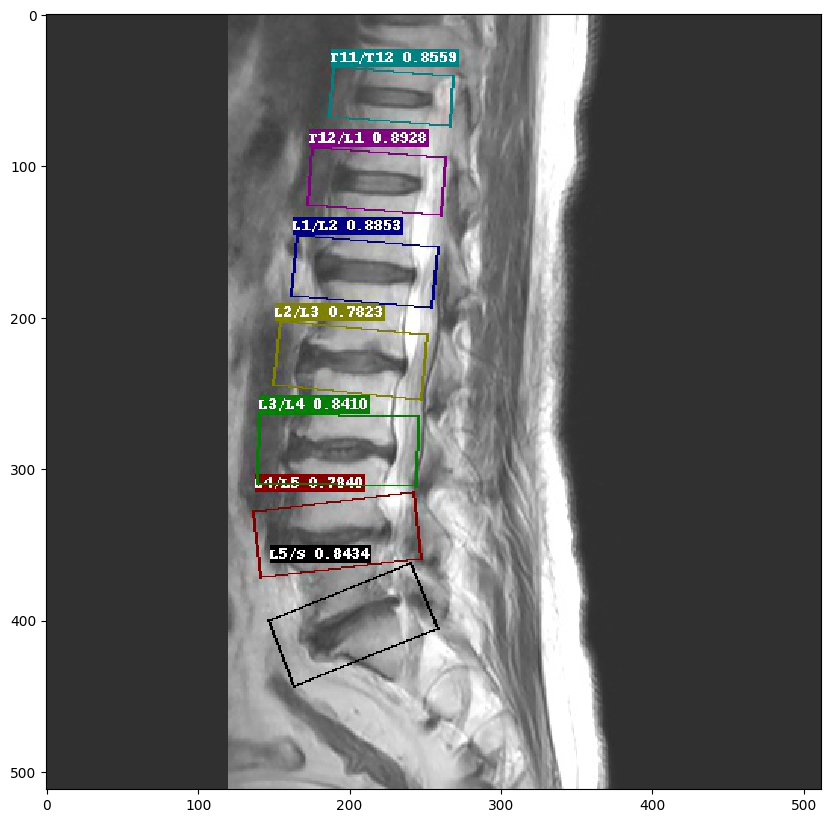

In [15]:
# 可视化检测效果
%matplotlib inline

import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(10, 20))
plt.imshow(Image.open('/home/aistudio/39006.jpg'))
plt.show()

## 9.总结
尝试PaddleDetection2.6版本的旋转框目标检测模型**PP-YOLOE-R**，进行训练和验证。感受是很丝滑。但是推理方面，希望推理工具FastDeploy可以支持**PP-YOLOE-R**

In [3]:
!unzip -o /home/aistudio/gzp.zip  -d dataset/gzp

  inflating: dataset/gzp/images/00000306_5.jpg  
  inflating: dataset/gzp/images/00000306_6.jpg  
  inflating: dataset/gzp/images/00000306_7.jpg  
  inflating: dataset/gzp/images/00000306_8.jpg  
  inflating: dataset/gzp/images/00000307_1.jpg  
  inflating: dataset/gzp/images/00000307_10.jpg  
  inflating: dataset/gzp/images/00000307_11.jpg  
  inflating: dataset/gzp/images/00000307_12.jpg  
  inflating: dataset/gzp/images/00000307_13.jpg  
  inflating: dataset/gzp/images/00000307_14.jpg  
  inflating: dataset/gzp/images/00000307_19.jpg  
  inflating: dataset/gzp/images/00000307_2.jpg  
  inflating: dataset/gzp/images/00000307_3.jpg  
  inflating: dataset/gzp/images/00000307_4.jpg  
  inflating: dataset/gzp/images/00000307_5.jpg  
  inflating: dataset/gzp/images/00000307_7.jpg  
  inflating: dataset/gzp/images/00000307_8.jpg  
  inflating: dataset/gzp/images/00000308_1.jpg  
  inflating: dataset/gzp/images/00000308_10.jpg  
  inflating: dataset/gzp/images/00000308_11.jpg  
  inflating:

In [4]:
!python tools/train.py -c configs/rotate/ppyoloe_r/gzp-v1.yaml --eval --use_vdl True --vdl_log_dir /home/aistudio/log_dir

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
[08/25 11:53:35] ppdet.data.source.coco INFO: Load [920 samples valid, 42 sa

In [ ]:
# 恢复性训练
%cd /home/aistudio/work/PaddleDetection/

!export CUDA_VISIBLE_DEVICES=0

!python tools/train.py -c configs/rotate/ppyoloe_r/gzp.yml -r output/gzp/best_model --use_vdl=true --vdl_log_dir=vdl_dir/scalar --eval -o LearningRate.base_lr=0.001

In [5]:
#导出模型
!python tools/export_model.py -c configs/rotate/ppyoloe_r/gzp.yaml \
    --output_dir=inference_model \
    -o weights=output/gzp/best_model.pdparams

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
[08/24 12:39:05] ppdet.utils.checkpoint INFO: Finish loading model weights: output/gzp/best_model.pdparams
loading annotations into memory...
Done (t=0.02s)
cr

In [6]:
!python tools/export_model.py -c configs/rotate/ppyoloe_r/gzp-v1.yaml \
    --output_dir=inference_model \
    -o weights=output/gzp-v1/best_model.pdparams

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
[08/25 18:12:43] ppdet.utils.checkpoint INFO: Finish loading model weights: output/gzp-v1/best_model.pdparams
loading annotations into memory...
Done (t=0.04s)

In [7]:
#使用导出的模型进行推理
!python deploy/python/infer.py --model_dir=inference_model/gzp-v1 \
    --image_file=/home/aistudio/PaddleDetection/dataset/gzp/images/00000042_4.jpg \
    --output_dir=/home/aistudio \
    --threshold=0.5 \
    --device=CPU

-----------  Running Arguments -----------
action_file: None
batch_size: 1
camera_id: -1
combine_method: nms
cpu_threads: 1
device: CPU
enable_mkldnn: False
enable_mkldnn_bfloat16: False
image_dir: None
image_file: /home/aistudio/PaddleDetection/dataset/gzp/images/00000042_4.jpg
match_metric: ios
match_threshold: 0.6
model_dir: inference_model/gzp-v1
output_dir: /home/aistudio
overlap_ratio: [0.25, 0.25]
random_pad: False
reid_batch_size: 50
reid_model_dir: None
run_benchmark: False
run_mode: paddle
save_images: True
save_mot_txt_per_img: False
save_mot_txts: False
save_results: False
scaled: False
slice_infer: False
slice_size: [640, 640]
threshold: 0.5
tracker_config: None
trt_calib_mode: False
trt_max_shape: 1280
trt_min_shape: 1
trt_opt_shape: 640
use_coco_category: False
use_dark: True
use_gpu: False
video_file: None
window_size: 50
------------------------------------------
-----------  Model Configuration -----------
Model Arch: YOLO
Transform Order: 
--transform op: Resize
--tr

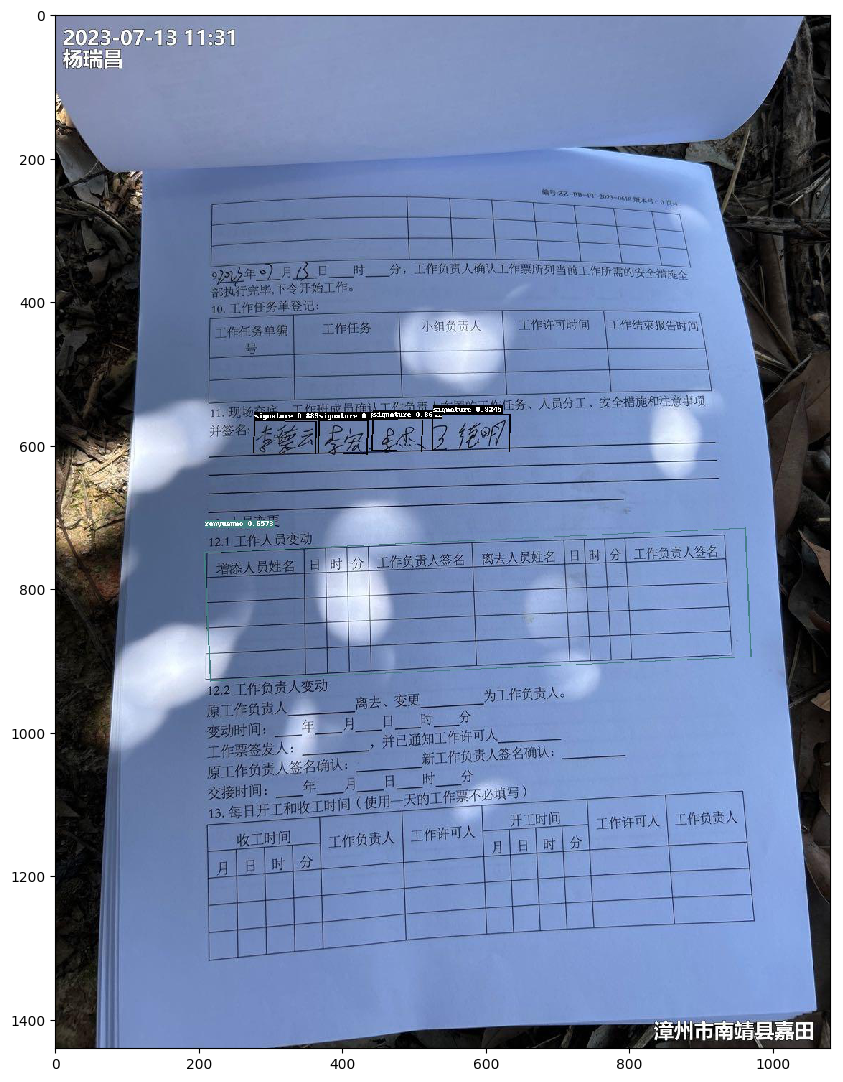

In [8]:
# 可视化检测效果
%matplotlib inline

import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(10, 20))
plt.imshow(Image.open('/home/aistudio/00000042_4.jpg'))
plt.show()

In [8]:
!unzip -o /home/aistudio/pred1.zip  -d dataset/

Archive:  /home/aistudio/pred1.zip
  inflating: dataset/pred1/00000101_1.jpg  
  inflating: dataset/pred1/00000101_2.jpg  
  inflating: dataset/pred1/00000101_3.jpg  
  inflating: dataset/pred1/00000101_4.jpg  
  inflating: dataset/pred1/00000102_1.jpg  
  inflating: dataset/pred1/00000102_2.jpg  
  inflating: dataset/pred1/00000102_4.jpg  
  inflating: dataset/pred1/00000102_5.jpg  
  inflating: dataset/pred1/00000104_1.jpg  
  inflating: dataset/pred1/00000104_2.jpg  
  inflating: dataset/pred1/00000104_3.jpg  
  inflating: dataset/pred1/00000104_4.jpg  
  inflating: dataset/pred1/00000104_5.jpg  
  inflating: dataset/pred1/00000105_3.jpg  
  inflating: dataset/pred1/00000105_4.jpg  
  inflating: dataset/pred1/00000105_5.jpg  
  inflating: dataset/pred1/00000105_6.jpg  
  inflating: dataset/pred1/00000107_1.jpg  
  inflating: dataset/pred1/00000107_2.jpg  
  inflating: dataset/pred1/00000107_3.jpg  
  inflating: dataset/pred1/00000107_4.jpg  
  inflating: dataset/pred1/00000107_5.jpg

In [10]:
#评估
!python tools/eval.py -c configs/rotate/ppyoloe_r/gzp-v1.yaml -o weights=/home/aistudio/work/PaddleDetection/output/gzp/best_model.pdparams

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
W0825 18:14:45.719940 26008 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 11.2
W0825

In [11]:
!pwd

/home/aistudio/PaddleDetection


In [12]:
# 预测部署
%cd /home/aistudio/PaddleDetection/
!python deploy/python/infer.py \
    --model_dir=inference_model/gzp-v1 \
    --image_dir=/home/aistudio/PaddleDetection/dataset/pred1/ \
    --device=GPU \
    --threshold=0.1 \
    --run_mode=paddle \
    --output_dir=/home/aistudio/work/output_dir \
    --save_results

/home/aistudio/PaddleDetection
-----------  Running Arguments -----------
action_file: None
batch_size: 1
camera_id: -1
combine_method: nms
cpu_threads: 1
device: GPU
enable_mkldnn: False
enable_mkldnn_bfloat16: False
image_dir: /home/aistudio/PaddleDetection/dataset/pred1/
image_file: None
match_metric: ios
match_threshold: 0.6
model_dir: inference_model/gzp-v1
output_dir: /home/aistudio/work/output_dir
overlap_ratio: [0.25, 0.25]
random_pad: False
reid_batch_size: 50
reid_model_dir: None
run_benchmark: False
run_mode: paddle
save_images: True
save_mot_txt_per_img: False
save_mot_txts: False
save_results: True
scaled: False
slice_infer: False
slice_size: [640, 640]
threshold: 0.1
tracker_config: None
trt_calib_mode: False
trt_max_shape: 1280
trt_min_shape: 1
trt_opt_shape: 640
use_coco_category: False
use_dark: True
use_gpu: False
video_file: None
window_size: 50
------------------------------------------
-----------  Model Configuration -----------
Model Arch: YOLO
Transform Order: 


In [22]:
# 预测
%cd /home/aistudio
!python  predict.py /home/aistudio/PaddleDetection/dataset/test /home/aistudio/work/output_dir_test

/home/aistudio
W0821 15:27:22.389241 27521 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 11.2
W0821 15:27:22.393191 27521 gpu_resources.cc:91] device: 0, cuDNN Version: 8.2.


In [40]:
# 预测
%cd /home/aistudio
!python  predict.py /home/aistudio/PaddleDetection/dataset/pred1 /home/aistudio/work/output_dir_pred1

/home/aistudio
[{'supercategory': 'none', 'id': 1, 'name': 'zhongjieno'}, {'supercategory': 'none', 'id': 2, 'name': 'checked'}, {'supercategory': 'none', 'id': 3, 'name': 'worktask'}, {'supercategory': 'none', 'id': 4, 'name': 'ancuo1'}, {'supercategory': 'none', 'id': 5, 'name': 'ancuoitem'}, {'supercategory': 'none', 'id': 6, 'name': 'signature'}, {'supercategory': 'none', 'id': 7, 'name': 'xuke'}, {'supercategory': 'none', 'id': 8, 'name': 'jiedi'}, {'supercategory': 'none', 'id': 9, 'name': 'wangluoxuke'}, {'supercategory': 'none', 'id': 10, 'name': 'ancuo1no'}, {'supercategory': 'none', 'id': 11, 'name': 'ancuo2no'}, {'supercategory': 'none', 'id': 12, 'name': 'dangmianxuke'}, {'supercategory': 'none', 'id': 13, 'name': 'ancuo2'}, {'supercategory': 'none', 'id': 14, 'name': 'renyuanno'}, {'supercategory': 'none', 'id': 15, 'name': 'renyuan'}, {'supercategory': 'none', 'id': 16, 'name': 'zhongjienno'}, {'supercategory': 'none', 'id': 17, 'name': 'jiedino'}, {'supercategory': 'none

In [8]:
# 预测
%cd /home/aistudio
!python  predictxml.py /home/aistudio/PaddleDetection/dataset/pred1 /home/aistudio/work/xml1

[[ 208.99998  1200.5       115.67388    38.007256    3.150288]]
[[614.5       507.50003    60.266537   37.01278     3.1749136]]
[[ 469.49997   1238.0001     133.297       38.998898     3.1491113]]
[[ 461.85388   1196.5028     130.00385     38.006565     3.1492848]]
[[ 461.15237   1156.9973     128.0039      39.006622     3.1494048]]
[[619.52765  573.5779    60.13312   47.03052    3.206718]]
[[611.       448.        57.29807   36.01292    3.176666]]
[[ 475.18604   1276.995      121.01651     37.994804     3.1581202]]
[[ 202.82445   1161.0034      94.00532     33.008774     3.1522305]]
[[ 208.99998  1200.5       115.67388    38.007256    3.150288]]
[[613.5       507.00003    60.299847   38.012222    3.1749136]]
[[537.7839    810.00256   118.00423    51.006638    3.1500669]]
[[ 208.65051  1238.9966    103.00485    31.00825     3.151301]]
[[505.7117    925.9974    111.00449    47.0071      3.1506016]]
[[524.5       498.50006   747.31055   317.02512     3.1549788]]
[[ 526.00006   1201.489  

In [4]:
# 预测
%cd /home/aistudio
!python  predictxml.py /home/aistudio/work/1 /home/aistudio/work/xml1

[[539.5       648.5       836.5723    266.01645     3.1547496]]
[[537.        306.0001    817.17926   379.06464     3.1599503]]
[[616.1434   619.50055  524.0038    75.00327    3.145417]]
[[543.5      646.5      837.23236  266.03006    3.157123]]
00000354_2.jpg
[[ 881.50006   1105.0001      76.18415     32.015232     3.1679022]]
[[ 767.99994  1109.         79.164505   34.014416    3.166904]]
[[ 762.5658    1008.50183     76.026306    33.01488      3.1679022]]
[[ 863.68634   1005.48663     70.064255    32.056286     3.1844234]]
[[502.5       718.         73.         26.          3.1415927]]
[[501.16977   739.9941     56.00892    19.014822    3.1594481]]
[[ 604.5       1073.0001     699.7321     372.4352       3.1901953]]
[[ 410.48898   1127.3854      78.05386     35.014282     3.1701565]]
[[ 410.8897    1026.9972      77.02597     30.01585      3.1675608]]
[[502.00006   718.00006    71.654854   25.011602    3.1556764]]
[[ 410.8897    1026.9972      77.02597     30.01585      3.1675608]]


In [36]:
# 预测
%cd /home/aistudio
!python  predict.py /home/aistudio/5 /home/aistudio/work/output_dir_pred5

/home/aistudio
[{'supercategory': 'none', 'id': 1, 'name': 'zhongjieno'}, {'supercategory': 'none', 'id': 2, 'name': 'checked'}, {'supercategory': 'none', 'id': 3, 'name': 'worktask'}, {'supercategory': 'none', 'id': 4, 'name': 'ancuo1'}, {'supercategory': 'none', 'id': 5, 'name': 'ancuoitem'}, {'supercategory': 'none', 'id': 6, 'name': 'signature'}, {'supercategory': 'none', 'id': 7, 'name': 'xuke'}, {'supercategory': 'none', 'id': 8, 'name': 'jiedi'}, {'supercategory': 'none', 'id': 9, 'name': 'wangluoxuke'}, {'supercategory': 'none', 'id': 10, 'name': 'ancuo1no'}, {'supercategory': 'none', 'id': 11, 'name': 'ancuo2no'}, {'supercategory': 'none', 'id': 12, 'name': 'dangmianxuke'}, {'supercategory': 'none', 'id': 13, 'name': 'ancuo2'}, {'supercategory': 'none', 'id': 14, 'name': 'renyuanno'}, {'supercategory': 'none', 'id': 15, 'name': 'renyuan'}, {'supercategory': 'none', 'id': 16, 'name': 'zhongjienno'}, {'supercategory': 'none', 'id': 17, 'name': 'jiedino'}, {'supercategory': 'none

In [4]:
!python tools/train.py -c configs/rotate/ppyoloe_r/gzp-v2.yaml --eval --use_vdl True --vdl_log_dir /home/aistudio/log_dir

[08/30 00:21:09] ppdet.engine INFO: Eval iter: 600
[08/30 00:21:25] ppdet.engine INFO: Eval iter: 700
[08/30 00:21:41] ppdet.engine INFO: Eval iter: 800
[08/30 00:21:58] ppdet.engine INFO: Eval iter: 900
[08/30 00:22:06] ppdet.metrics.metrics INFO: Accumulating evaluatation results...
[08/30 00:22:06] ppdet.metrics.metrics INFO: mAP(0.50, 11point) = 87.71%
[08/30 00:22:06] ppdet.engine INFO: Total sample number: 1899, average FPS: 12.11857626796781
[08/30 00:22:06] ppdet.engine INFO: Best test bbox ap is 0.877.
[08/30 00:22:07] ppdet.utils.checkpoint INFO: Save checkpoint: output/gzp-v2
[08/30 00:22:08] ppdet.engine INFO: Epoch: [58] [  0/474] learning_rate: 0.001638 loss: 0.878283 loss_cls: 0.580023 loss_iou: 0.078333 loss_dfl: 1.662204 eta: 2:59:38 batch_cost: 0.3435 data_cost: 0.0004 ips: 11.6447 images/s
[08/30 00:22:34] ppdet.engine INFO: Epoch: [58] [ 60/474] learning_rate: 0.001630 loss: 0.831232 loss_cls: 0.562459 loss_iou: 0.072977 loss_dfl: 1.508111 eta: 2:59:16 batch_cost: 0

In [ ]:
# 恢复性训练
%cd /home/aistudio/work/PaddleDetection/

!export CUDA_VISIBLE_DEVICES=0

!python tools/train.py -c configs/rotate/ppyoloe_r/gzp-v2.yml -r output/gzp-v2/best_model --use_vdl=true --vdl_log_dir=vdl_dir/scalar --eval -o LearningRate.base_lr=0.001

In [10]:
#导出模型
!python tools/export_model.py -c configs/rotate/ppyoloe_r/gzp-v2.yaml \
    --output_dir=inference_model \
    -o weights=output/gzp/best_model.pdparams

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
[08/30 08:39:17] ppdet.utils.checkpoint INFO: The shape [20] in pretrained weight yolo_head.pred_cls.0.bias is unmatched with the shape [19] in model yolo_head

In [6]:
#评估
%cd /home/aistudio/PaddleDetection/

!python tools/eval.py -c configs/rotate/ppyoloe_r/gzp-v2.yaml -o weights=/home/aistudio/PaddleDetection/output/gzp-v2/best_model.pdparams

/home/aistudio/PaddleDetection
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
W0830 11:29:49.184456  2651 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, 

In [15]:
# 预测
%cd /home/aistudio
!python  predictxml.py /home/aistudio/work/3 /home/aistudio/work/xml3

[[ 611.5       1184.4999     491.16296     38.999676     3.1456661]]
[[ 611.5       1145.         491.18335     43.999634     3.1456661]]
00000658_1.jpg
[[977.50006   882.0001     86.23824    52.03811    -1.5359266]]
[[967.0077    274.60797   102.01961    39.992313   -1.5511911]]
[[970.5       373.         75.11996    41.012085   -1.5441358]]
[[987.00006   779.        109.48163    57.006775   -1.5616223]]
[[980.0024    668.7428    105.00476    51.007206   -1.5612729]]
[[975.00006  465.5      113.93792   51.991856  -1.553099]]
[[932.99677   260.31958    97.00515    35.008446   -1.5604874]]
[[933.00006   355.50003    76.59864    31.010473   -1.5576392]]
[[974.4999    561.5       118.309235   50.009266   -1.5453781]]
[[1269.4999    573.5       847.0785    248.00806    -1.562532]]
[[1220.4594    923.7492     46.68774    43.566036    3.302968]]
[[1262.984     923.0881     44.721367   44.54248     3.321446]]
[[181.41176   908.353      49.47727    46.56684    -1.3258177]]
[[1182.         915.

In [18]:
# 预测
%cd /home/aistudio
!python  predictxml.py /home/aistudio/work/3 /home/aistudio/work/xml3

  -4.3138687e-02]]
00000633_1.jpg
[[678.8269    445.5119     55.03635    37.048244    3.1779404]]
[[680.5       529.5        58.379097   39.011303    3.1760616]]
[[679.99365   596.74347    59.031883   39.012817    3.1672282]]
[[678.        644.5        60.         31.          3.1415927]]
[[672.7666    676.5045     60.008327   28.012774    3.1582577]]
[[676.19525  391.4897    59.03388   41.044216   3.175478]]
[[664.5       704.         73.         32.          3.1415927]]
[[324.65848   896.49664   101.00495    32.00833     3.1514933]]
[[316.49997  926.99994  103.28641   28.998634   3.151301]]
[[661.50006   737.         79.3987     30.997517    3.1542501]]
[[405.66208  935.0064    77.05842   43.045265   3.180534]]
[[525.        894.00006   101.22768    40.011955    3.1613922]]
[[431.51102   892.6146     78.05386    35.014282    3.1701565]]
[[499.50003  935.5       88.12614   39.03566    3.164577]]
[[597.        561.5       709.6733    410.206       3.1740215]]
[[597.        561.5       

In [4]:
# 预测
%cd /home/aistudio
!python  predictxmlNMS.py /home/aistudio/work/4 /home/aistudio/work/xml4

[[372.5       694.5        88.04544    45.011105    3.1643157]]
[[364.1144    734.0028     83.02409    32.014797    3.1656845]]
[[283.84494  735.99646   87.02299   30.015057   3.164577]]
[[207.39322   739.5126     94.04786    38.044456    3.1734967]]
[[384.00003   623.50006    86.86577    34.049057    3.1764624]]
[[480.48944   692.4657     92.02169    45.03383     3.1643157]]
[[518.        222.5       745.39594   199.02234     3.1550145]]
[[521.5       438.00003   732.1803    214.00224     3.1470568]]
[[521.5       438.00003   732.1803    214.00224     3.1470568]]
[[548.5       932.        779.2612    197.01003     3.1505783]]
[[518.        222.5       745.39594   199.02234     3.1550145]]
00000900_5.jpg
[[690.9964   391.0152   164.07619   65.03075    3.172258]]
[[ 5.3306232e+02  6.2149750e+02  9.3073572e+02  2.0419656e+02
  -3.9806727e-02]]
00000908_4.jpg
[[1123.5623     768.00256     69.06507     24.020823    -1.5291538]]
[[474.        846.00006    32.311954   28.070229   -1.5083776]